# 1. **Dataset description**

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

# 2. Preprocessing

In [ ]:
## Add libraries to use
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('auto_imp.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    int64  
 11  peak_rpm     195 non-null    int64  
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 23.0+ KB


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [ ]:
df2['fuel_type'].replace({'gas': 0, 'diesel': 1}, inplace=True)

In [ ]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [ ]:
# define X and y
X = df2.drop('fuel_type', axis=1)  # drop the fuel_type column from X
y = df2['fuel_type']

# print the shapes of X and y
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print(X)
print(y)

Shape of X: (195, 14)
Shape of y: (195,)
     wheel_base  length  width  heights  curb_weight  engine_size  bore  \
0          88.6   168.8   64.1     48.8         2548          130  3.47   
1          88.6   168.8   64.1     48.8         2548          130  3.47   
2          94.5   171.2   65.5     52.4         2823          152  2.68   
3          99.8   176.6   66.2     54.3         2337          109  3.19   
4          99.4   176.6   66.4     54.3         2824          136  3.19   
..          ...     ...    ...      ...          ...          ...   ...   
190       109.1   188.8   68.9     55.5         2952          141  3.78   
191       109.1   188.8   68.8     55.5         3049          141  3.78   
192       109.1   188.8   68.9     55.5         3012          173  3.58   
193       109.1   188.8   68.9     55.5         3217          145  3.01   
194       109.1   188.8   68.9     55.5         3062          141  3.78   

     stroke  comprassion  horse_power  peak_rpm  city_mpg 

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

# print the shapes of the resulting sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)
df2

Shape of X_train: (136, 14)
Shape of X_test: (59, 14)
Shape of y_train: (136,)
Shape of y_test: (59,)


,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC, what do you notice?

In [ ]:
logReg=LogisticRegression(solver='lbfgs', max_iter=1000)
model_logReg=logReg.fit(X_train,y_train)
# Make predictions with the classifier:
y_pred = logReg.predict(X_test)
matrix=confusion_matrix(y_test, y_pred)
# Evaluate label (subsets) accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Cohen Kappa:", metrics.cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
auc_score3 = roc_auc_score(y_test,y_pred)
print('AUC: %.2f' % auc_score3)

Accuracy: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Confusion Matrix:
[[50  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC: 1.00


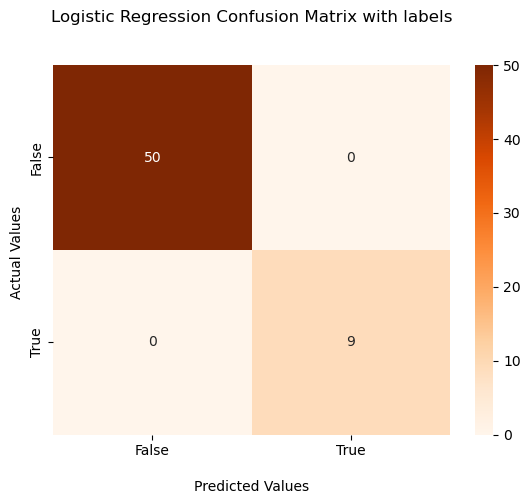

In [ ]:
ax = sns.heatmap(matrix, annot=True, cmap='Oranges')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("logReg.jpg")
plt.show()

Logistic regression: It is a type of supervised learning. Logistic regression models can help teams identify data anomalies. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.
Here,

Accuracy is perfect i.e., 1.0;
Area under the curve is 1.0;
F1 score is 1.0;
Cohen Kappa is 1.0

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [ ]:
# Initialize classifier:
gNB = GaussianNB()
# Train the classifier:
model = gNB.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gNB.predict(X_test)
matrix=confusion_matrix(y_test, predictive_labels)
# Evaluate label (subsets) accuracy:
print("Accuracy:", accuracy_score(y_test, predictive_labels))
print("F1 Score:", metrics.f1_score(y_test, predictive_labels))
print("Cohen Kappa:", metrics.cohen_kappa_score(y_test, predictive_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictive_labels))
print("Classification Report:")
print(classification_report(y_test, predictive_labels))
auc_score3 = roc_auc_score(y_test,predictive_labels)
print('AUC: %.2f' % auc_score3)

Accuracy: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Confusion Matrix:
[[50  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC: 1.00


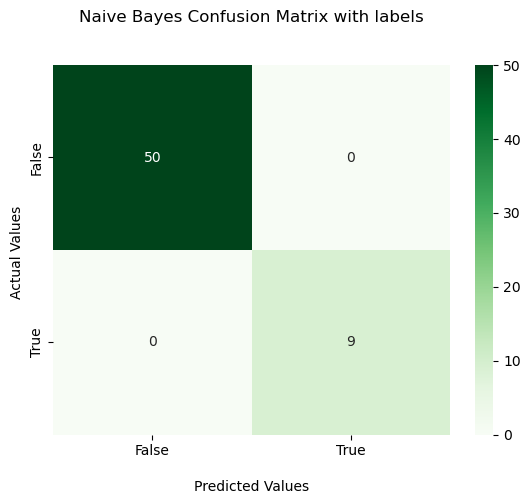

In [ ]:
ax = sns.heatmap(matrix, annot=True, cmap='Greens')

ax.set_title('Naive Bayes Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("gNB.jpg")
plt.show()

Naive Bayes: Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
Here,

Accuracy is perfect i.e., 1.0; Area under the curve is 1.0; F1 score is 1.0; Cohen Kappa is 1.0
These results are same as of Logistic regression

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC. What do you notice?

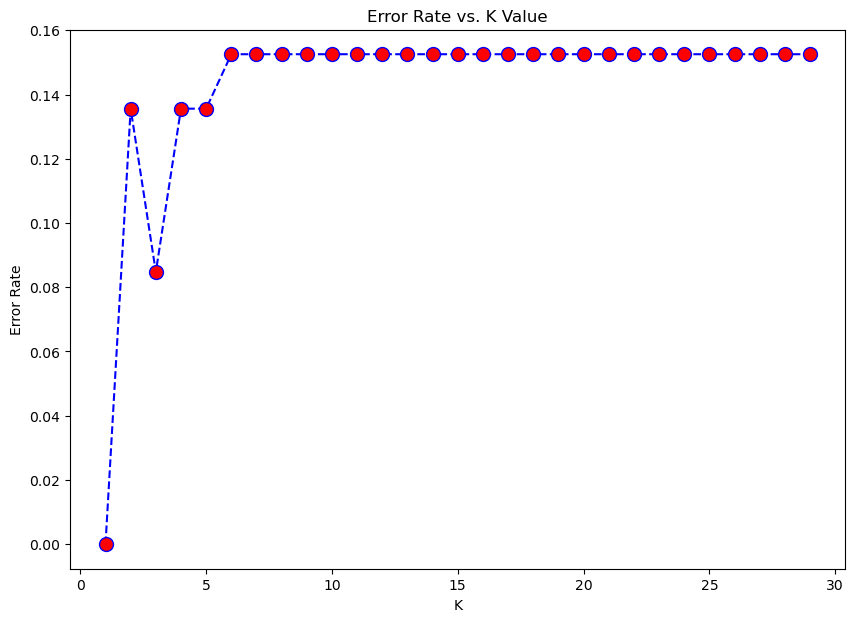

In [ ]:
#Find the optimal number of neighbors
# Initialize an array that stores the error rates.
error_rates = []

for a in range(1, 30):
    k = a
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    preds = kNN.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()


The value of error is closest to 0 when k is 3. Thus we use k as 3

In [ ]:
#Train classifier on the optimal k that we chose from the plot
k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train, y_train)
preds = kNN.predict(X_test)
matrix=confusion_matrix(y_test, preds)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", metrics.f1_score(y_test, preds))
print("Cohen Kappa:", metrics.cohen_kappa_score(y_test, preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("Classification Report:")
print(classification_report(y_test, preds))
auc_score2 = roc_auc_score(y_test,preds)
print('AUC: %.2f' % auc_score2)

Accuracy: 0.8813559322033898
F1 Score: 0.46153846153846156
Cohen Kappa: 0.4057553956834532
Confusion Matrix:
[[49  1]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59

AUC: 0.66


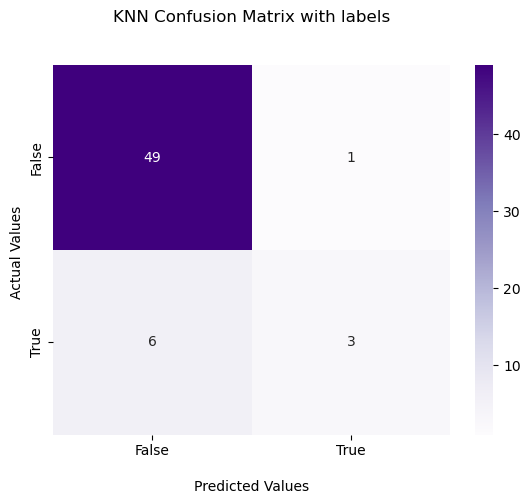

In [ ]:
ax = sns.heatmap(matrix, annot=True, cmap='Purples')

ax.set_title('KNN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("kNN.jpg")
plt.show()

Knn : This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.

Here,
Accuracy is 0.864; Area under the curve is 0.56; F1 score is 0.1999; Cohen Kappa is 0.175
These results are not same as of Logistic regression and Naive Bayes algorithm
So, Logistic regression and Naive bayes algoorithm are better than KNN.

## 3.4  I have chosen Support vector machine (SVM) to classify data:


In [ ]:
clf = SVC()
model=clf.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)
matrix2=confusion_matrix(y_test, y_pred)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Cohen Kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,zero_division=0))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=0))
auc_score5 = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc_score5)

Accuracy: 0.847457627118644
F1 Score: 0.0
Cohen Kappa: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

AUC: 0.50


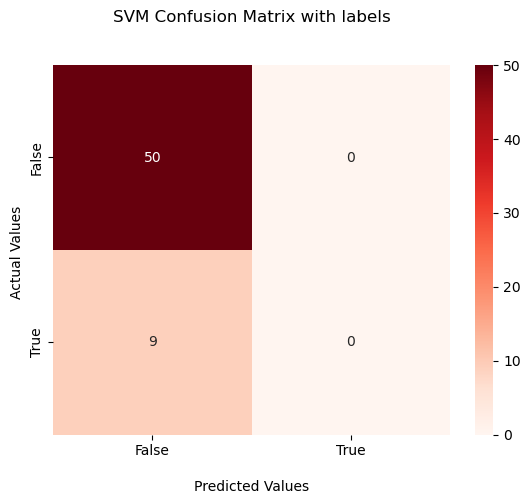

In [ ]:
ax = sns.heatmap(matrix2, annot=True, cmap='Reds')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("clf.jpg")
plt.show()

Support Vector Machine (SVM) : SVM is a supervised learning machine learning algorithm that can be used for both classification or regression challenges. SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages.

Here,
Accuracy is 0.8474 which is less than the KNN, logistic regression and Naive Bayes algorithm;
Area under the curve is 0.5 which is less than the KNN, logistic regression and Naive Bayes algorithm
F1 score is 0; Cohen Kappa is 0

### 3.5 Comparision of results

Comparing the results,

a. Logistic Regression and Naive Bayes performed perfectly with 100% accuracy.

b. We see that all models performed fairly well with AUC scores ranging from 0.5 to 1.

c. However,Naive Bayes and Logistic regression models had the highest AUC score of 1, indicating that they have the best performance among the models.

d. The SVM model had the lowest AUC score of 0.5.

e. The KNN model had an optimal k value of 3 and an AUC score of 0.66. While the accuracy is decent, the model struggled to correctly classify instances.

## 4. Trying to fix the inbalanced nature of the data by running one of the classification methods (preferable one that "failed" before) and see if you get better results.**

Since the KNN's performance is not good in terms of AUC, we will try to fix the imbalance of the data using the Oversampling method and rerun KNN.

Accuracy: 0.8305084745762712
F1 Score: 0.6153846153846153
Cohen Kappa: 0.5195439739413681
Confusion Matrix:
[[41  9]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.47      0.89      0.62         9

    accuracy                           0.83        59
   macro avg       0.72      0.85      0.75        59
weighted avg       0.90      0.83      0.85        59

AUC: 0.85


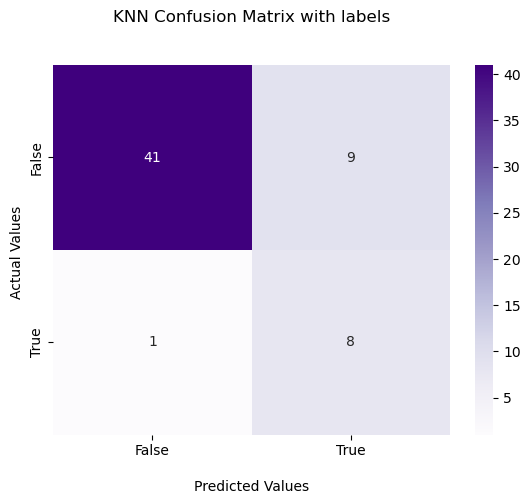

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_train_smote, y_train_smote)
preds = kNN.predict(X_test)
matrix=confusion_matrix(y_test, preds)

print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", metrics.f1_score(y_test, preds))
print("Cohen Kappa:", metrics.cohen_kappa_score(y_test, preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("Classification Report:")
print(classification_report(y_test, preds))
auc_score2 = roc_auc_score(y_test,preds)
print('AUC: %.2f' % auc_score2)

ax = sns.heatmap(matrix, annot=True, cmap='Purples')
ax.set_title('KNN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig("kNN_balanced.jpg")
plt.show()


Knn performs better than before with better f1 score, AUC and Cohen Kappa

Text(0.5, 1.0, 'After Oversampling')

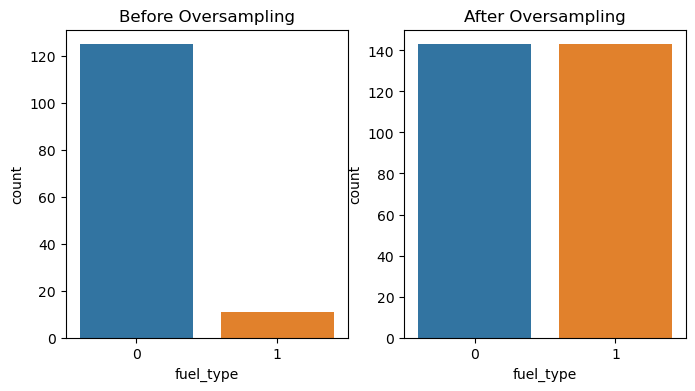

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
sns.countplot(x=y_train, ax = axs[0])
axs[0].set_title("Before Oversampling")
sns.countplot(x=y_train_resampled, ax = axs[1])
axs[1].set_title("After Oversampling")